## 3D pipelines reconstruction project - Conception Détaillé

#### ------------------------------------------------------------------TODO---------------------------------------------------------------------------------------------
* Compléter les entêtes des fonctions (headers)
* Compléter les classes
* Compléter les diagrammes de classe et autres diagrammes
* Vérifier la cohérence entrées/sorties -> Test
* Construire l'environnement sur pycharm (Dockerizer ?)
* Construire le projet, les fichier, leurs hiérarchie, le main et makefile
* 
* recherche de fonctionnalités existantes, de code et integrer les headers -> test
* tests unitaires sur les fonctionnalités 
* 
* Compléter document
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [53]:
from IPython import display

### Étape 2 : Création de l'arbre

In [57]:
import torch
import scipy.spatial
from torch_geometric.nn import knn

ModuleNotFoundError: No module named 'torch_geometric'

#### Clustering des résultats

rassembler les points similaires afin de créer un ensemble d’éléments candidats.
Les points non groupés ou dans des groupes trop petits sont ignorés.

In [34]:
knn(x, y, k, batch_x=None, batch_y=None)

NameError: name 'knn' is not defined

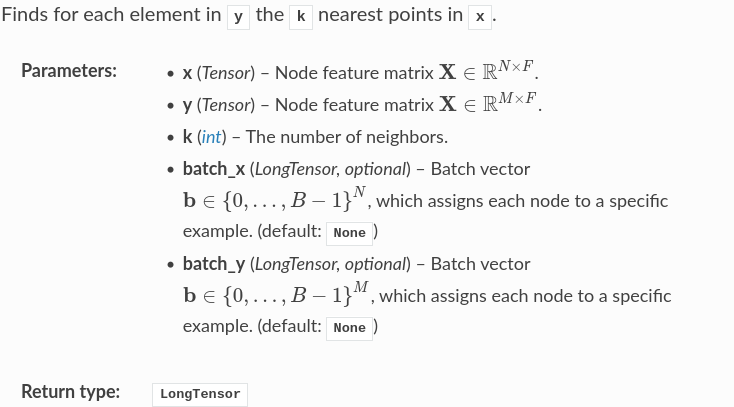

exemple [https://pytorch-geometric.readthedocs.io/en/1.3.1/modules/nn.html#torch_geometric.nn.pool.knn] : 

In [40]:
x = torch.Tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]])
batch_x = torch.tensor([0, 0, 0, 0])
y = torch.Tensor([[-1, 0], [1, 0]])
batch_x = torch.tensor([0, 0])
assign_index = knn(x, y, 2, batch_x, batch_y)

NameError: name 'knn' is not defined

#### Création du graphe

Création d’un graphe pondéré où chaque nœud correspond à un élément candidat, et les arêtes sont pondérées par la distance entre deux éléments

'https://pytorch-geometric.readthedocs.io/en/1.3.1/modules/nn.html#torch_geometric.nn.pool.knn_graph')

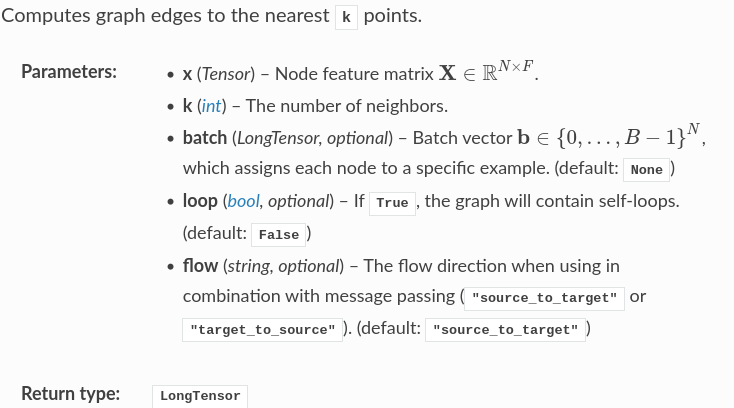

Exemple :

In [46]:
x = torch.Tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]])
batch = torch.tensor([0, 0, 0, 0])
edge_index = knn_graph(x, k=2, batch=batch, loop=False)

NameError: name 'knn_graph' is not defined

#### Création de la Minimum Spanning Forest

Le graphe candidat est affiné à l’aide d’une Minimum Spanning Forest, qui permet de déterminer les sous-ensembles les plus courts (en terme de distance) et de les ajouter au graphe final

https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.mst.minimum_spanning_tree.html#networkx.algorithms.mst.minimum_spanning_tree

Exemple : 

In [48]:
G=nx.cycle_graph(4)
G.add_edge(0,3,weight=2) # assign weight 2 to edge 0-3
T=nx.minimum_spanning_tree(G)
print(sorted(T.edges(data=True)))
# [(0, 1, {}), (1, 2, {}), (2, 3, {})]

NameError: name 'nx' is not defined

#### Raffinement du graphe par heuristique

On vérifie que le graphe résultat respecte bien les règles de relations entre éléments (voir généralités). En cas de différence, le graphe est corrigé pour respecter ces heuristiques

In [ ]:
def fonction(param): 
    """
    Return the ... 
    
    In  : 
    out : 
    """
    result = 0

    return result

#### Créer l'arbre candidat

En prenant en entrée un nuage de points labellisés par la solution CO-002, la solution est capable de créer un graphe de composants de pipeline caractérisés par leur :
* Type
* Direction
* Rayon
* Position {x, y, z}

In [ ]:
def ALGO1(param): #donné dans le papier
    """
    Return the ... 
    
    In  : 
    out : 
    """
    result = 0

    return result

## Annexe

In [54]:
display.Code("pytorch_geometric/torch_geometric/nn/pool/__init__.py")

from .max_pool import max_pool, max_pool_x, max_pool_neighbor_x
from .avg_pool import avg_pool, avg_pool_x, avg_pool_neighbor_x
from .graclus import graclus
from .voxel_grid import voxel_grid
from .topk_pool import TopKPooling
from .sag_pool import SAGPooling
from .edge_pool import EdgePooling
from .asap import ASAPooling
from .pan_pool import PANPooling
from .mem_pool import MemPooling

try:
    import torch_cluster
except ImportError:
    torch_cluster = None


def fps(x, batch=None, ratio=0.5, random_start=True):
    r"""A sampling algorithm from the `"PointNet++: Deep Hierarchical Feature
    Learning on Point Sets in a Metric Space"
    <https://arxiv.org/abs/1706.02413>`_ paper, which iteratively samples the
    most distant point with regard to the rest points.

    Args:
        x (Tensor): Node feature matrix
            :math:`\mathbf{X} \in \mathbb{R}^{N \times F}`.
        batch (LongTensor, optional): Batch vector
            :math:`\mathbf{b} \in {\{ 0, \ldots, B-1\}}^N`, which assigns each
            node to a specific example. (default: :obj:`None`)
        ratio (float, optional): Sampling ratio. (default: :obj:`0.5`)
        random_start (bool, optional): If set to :obj:`False`, use the first
            node in :math:`\mathbf{X}` as starting node. (default: obj:`True`)

    :rtype: :class:`LongTensor`

    .. code-block:: python

        import torch
        from torch_geometric.nn import fps

        x = torch.Tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]])
        batch = torch.tensor([0, 0, 0, 0])
        index = fps(x, batch, ratio=0.5)
    """
    if torch_cluster is None:
        raise ImportError('`fps` requires `torch-cluster`.')

    return torch_cluster.fps(x, batch, ratio, random_start)


def knn(x, y, k, batch_x=None, batch_y=None, cosine=False, num_workers=1):
    r"""Finds for each element in :obj:`y` the :obj:`k` nearest points in
    :obj:`x`.

    Args:
        x (Tensor): Node feature matrix
            :math:`\mathbf{X} \in \mathbb{R}^{N \times F}`.
        y (Tensor): Node feature matrix
            :math:`\mathbf{X} \in \mathbb{R}^{M \times F}`.
        k (int): The number of neighbors.
        batch_x (LongTensor, optional): Batch vector
            :math:`\mathbf{b} \in {\{ 0, \ldots, B-1\}}^N`, which assigns each
            node to a specific example. (default: :obj:`None`)
        batch_y (LongTensor, optional): Batch vector
            :math:`\mathbf{b} \in {\{ 0, \ldots, B-1\}}^M`, which assigns each
            node to a specific example. (default: :obj:`None`)
        cosine (boolean, optional): If :obj:`True`, will use the cosine
            distance instead of euclidean distance to find nearest neighbors.
            (default: :obj:`False`)
        num_workers (int): Number of workers to use for computation. Has no
            effect in case :obj:`batch_x` or :obj:`batch_y` is not
            :obj:`None`, or the input lies on the GPU. (default: :obj:`1`)

    :rtype: :class:`LongTensor`

    .. code-block:: python

        import torch
        from torch_geometric.nn import knn

        x = torch.Tensor([[-1, -1], [-1, 1], [1, -1], [1, 1]])
        batch_x = torch.tensor([0, 0, 0, 0])
        y = torch.Tensor([[-1, 0], [1, 0]])
        batch_y = torch.tensor([0, 0])
        assign_index = knn(x, y, 2, batch_x, batch_y)
    """
    if torch_cluster is None:
        raise ImportError('`knn` requires `torch-cluster`.')

    return torch_cluster.knn(x, y, k, batch_x, batch_y, cosine, num_workers)


def knn_graph(x, k, batch=None, loop=False, flow='source_to_target',
              cosine=False, num_workers=1):
    r"""Computes graph edges to the nearest :obj:`k` points.

    Args:
        x (Tensor): Node feature matrix
            :math:`\mathbf{X} \in \mathbb{R}^{N \times F}`.
        k (int): The number of neighbors.
        batch (LongTensor, optional): Batch vector
            :math:`\mathbf{b} \in {\{ 0, \ldots, B-1\}}^N`, which assigns each
            node to a specific examp

In [55]:
display.Code("networkx/networkx/algorithms/tree/mst.py")

"""
Algorithms for calculating min/max spanning trees/forests.

"""
from dataclasses import dataclass, field
from enum import Enum
from heapq import heappop, heappush
from operator import itemgetter
from itertools import count
from math import isnan
from queue import PriorityQueue

import networkx as nx
from networkx.utils import UnionFind, not_implemented_for

__all__ = [
    "minimum_spanning_edges",
    "maximum_spanning_edges",
    "minimum_spanning_tree",
    "maximum_spanning_tree",
    "partition_spanning_tree",
    "EdgePartition",
    "SpanningTreeIterator",
]


class EdgePartition(Enum):
    """
    An enum to store the state of an edge partition. The enum is written to the
    edges of a graph before being pasted to `kruskal_mst_edges`. Options are:

    - EdgePartition.OPEN
    - EdgePartition.INCLUDED
    - EdgePartition.EXCLUDED
    """

    OPEN = 0
    INCLUDED = 1
    EXCLUDED = 2


@not_implemented_for("multigraph")
def boruvka_mst_edges(
    G, minimum=True, weight="weight", keys=False, data=True, ignore_nan=False
):
    """Iterate over edges of a Borůvka's algorithm min/max spanning tree.

    Parameters
    ----------
    G : NetworkX Graph
        The edges of `G` must have distinct weights,
        otherwise the edges may not form a tree.

    minimum : bool (default: True)
        Find the minimum (True) or maximum (False) spanning tree.

    weight : string (default: 'weight')
        The name of the edge attribute holding the edge weights.

    keys : bool (default: True)
        This argument is ignored since this function is not
        implemented for multigraphs; it exists only for consistency
        with the other minimum spanning tree functions.

    data : bool (default: True)
        Flag for whether to yield edge attribute dicts.
        If True, yield edges `(u, v, d)`, where `d` is the attribute dict.
        If False, yield edges `(u, v)`.

    ignore_nan : bool (default: False)
        If a NaN is found as an edge weight normally an exception is raised.
        If `ignore_nan is True` then that edge is ignored instead.

    """
    # Initialize a forest, assuming initially that it is the discrete
    # partition of the nodes of the graph.
    forest = UnionFind(G)

    def best_edge(component):
        """Returns the optimum (minimum or maximum) edge on the edge
        boundary of the given set of nodes.

        A return value of ``None`` indicates an empty boundary.

        """
        sign = 1 if minimum else -1
        minwt = float("inf")
        boundary = None
        for e in nx.edge_boundary(G, component, data=True):
            wt = e[-1].get(weight, 1) * sign
            if isnan(wt):
                if ignore_nan:
                    continue
                msg = f"NaN found as an edge weight. Edge {e}"
                raise ValueError(msg)
            if wt < minwt:
                minwt = wt
                boundary = e
        return boundary

    # Determine the optimum edge in the edge boundary of each component
    # in the forest.
    best_edges = (best_edge(component) for component in forest.to_sets())
    best_edges = [edge for edge in best_edges if edge is not None]
    # If each entry was ``None``, that means the graph was disconnected,
    # so we are done generating the forest.
    while best_edges:
        # Determine the optimum edge in the edge boundary of each
        # component in the forest.
        #
        # This must be a sequence, not an iterator. In this list, the
        # same edge may appear twice, in different orientations (but
        # that's okay, since a union operation will be called on the
        # endpoints the first time it is seen, but not the second time).
        #
        # Any ``None`` indicates that the edge boundary for that
        # component was empty, so that part of the forest has been
        # completed.
        #
        # TODO This can be parallelized, both in the outer loop over
        # each component in the forest 